# **Hoax Detection Model Development**

In [36]:
import re
import numpy as np
import math
import pandas as pd

# **Basic Machine Learning Workflow**


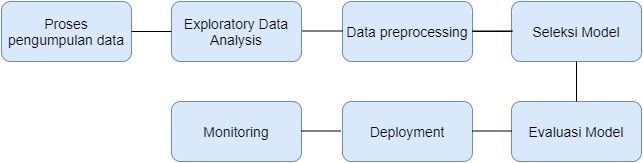

### Hoax News Detection Workflow
1. Data Collection
  *   Mengumpulkan beberapa berita non-hoax kedalam Datasets
2. Exploratory Data Analysis
3. Pre-processing
  *   Membelah isi berita menjadi beberapa kalimat berdasarkan banyaknya kalimat pada suatu berita
  *   Menghilangkan Special Character pada setiap kalimat
  *   Menghilangkan kata duplicate dan Stopword
  *   Implemetasi TF-IDF
  *   Implementasi Cosine Similarity
4. Model Selection
  *   Model yang digunakan adalah ANN
  *   Hyperparameter Tuning terhadap model ANN
  *   Seleksi Optimal Hyperparameter
5. Model Evaluation
  *   Model performance testing

In [37]:
dataset = pd.read_csv("./dataset/Fake.csv")

In [48]:
docs = dataset.loc[0,'text'].split(".")
docs = [docs.replace('\n', '') for docs in docs]
def showDocs(docs):
  for i in docs:
    print(i)
docs

['Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that',
 ' Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media',
 '  The former reality show star had just one job to do and he couldn t do it',
 ' As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted',
 '  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year',
 ' 2018 will be a great year for America!  Donald J',
 ' Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect',
 'What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump!

#**Pre-processing**

###**1.1 Special character removal**

In [50]:
text = dataset.loc[0,'text']

In [41]:
from stop_word import stop_words

In [43]:
import re

def preprocess_text(text):
    # Menghilangkan tanda baca
    text = re.sub(r'[^\w\s.-]', '', text)

    # Memisahkan teks menjadi kata-kata
    words = text.split()

    # Daftar stopwords yang umum
    
     # Menghilangkan stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Menghilangkan singkatan sederhana
    filtered_words = [re.sub(r'\.', '', word) for word in filtered_words]

    # Menghilangkan angka
    filtered_words = [re.sub(r'\d', '', word) for word in filtered_words]

    return filtered_words


In [52]:
import nltk
from nltk.stem import PorterStemmer

# Download data yang dibutuhkan untuk NLTK (jalankan sekali pada setiap instalasi)
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [53]:
def steaming(word):
    stemmer = PorterStemmer()
    stemmed_word = stemmer.stem(word)
    return stemmed_word

In [55]:
# Memproses teks
processed_words = preprocess_text(text)
processed_unique_words = set(preprocess_text(text))
processed_unique_words = list(processed_unique_words)
steaming_result = [steaming(i) for i in processed_unique_words]

In [56]:
steaming_result

['',
 'do',
 'differ',
 'down',
 'wendywhistl',
 'shout',
 'yearstrump',
 'year',
 'calvinstowel',
 'you',
 'presid',
 'eve',
 'presid',
 'power',
 'happi',
 'welll',
 'impeach',
 'rainyday',
 'here',
 'love',
 'wrong',
 'hear',
 'grow',
 'hate',
 'mirandayav',
 'tweet',
 'think',
 'he',
 'thanksgiv',
 'rapidli',
 'year',
 'work',
 'countri',
 'j',
 'decemb',
 'thi',
 'donald',
 'he',
 'gutter',
 'steven',
 'kind',
 'messag',
 'petti',
 'no',
 'new',
 'stronger',
 'filter',
 'teenag',
 'pictwittercomfpaekypa',
 'wendi',
 'fake',
 'long',
 'citizen',
 'swan',
 'hater',
 'vote',
 'dale',
 'word',
 'great',
 'your',
 'congress',
 'lack',
 'burtongetti',
 'realdonaldtrump',
 'bishop',
 'like',
 'trump',
 'direct',
 'support',
 'talk',
 'tweet',
 'ddale',
 'fake',
 'year',
 'schulz',
 'pant',
 'star',
 'expectwhat',
 'alan',
 'control',
 'media',
 'american',
 'badli',
 'holiday',
 'angri',
 'marlen',
 'chang',
 'presidentialhow',
 'realiti',
 'goodin',
 'american',
 'dishonest',
 'healthi'

### **1.4. Implementing TF-IDF**

In [1021]:
# OTW juga
tf = np.zeros((len(processed_unique_words), len(docs)))

In [1022]:
len(docs)

21

In [1023]:
for i in range(len(docs)):
    for x in range(len(processed_unique_words)):
        count = docs[i].count(processed_unique_words[x])
        tf[x][i] = 0 if count == 0 else 1 + math.log(1 + count)

In [1024]:
import pandas as pd
tfdf = pd.DataFrame(tf)
tfdf.index = processed_unique_words
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     # Print the dataframe with the modified settings
#     display(tfdf)
tfdf.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
9 November 2021,0.0,1.693147,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
realistic,0.0,0.000000,0.000000,0.0,0.0,1.693147,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.693147,0.0
irregularities,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.693147,0.0,0.0,0.000000,0.0,0.000000,0.0
plausible,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.693147,0.0,0.000000,0.0
procedures,0.0,0.000000,1.693147,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.693147,0.0,0.0,0.000000,0.0,0.000000,0.0


In [1025]:
nonzero_counts = tfdf.apply(lambda row: row.astype(bool).sum(), axis=1)

# Menambahkan hasil perhitungan sebagai kolom baru pada DataFrame
tfdf['df'] = nonzero_counts

# # Menampilkan DataFrame dengan hasil perhitungan
#ith pd.option_context(''', None, display.max_columns', None):
#   # Print the dataframe with the modified settings
#   display(ttfdf

tfdf.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,df
9 November 2021,0.0,1.693147,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,1
realistic,0.0,0.000000,0.000000,0.0,0.0,1.693147,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.693147,0.0,2
irregularities,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.693147,0.0,0.0,0.000000,0.0,0.000000,0.0,1
plausible,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,1.693147,0.0,0.000000,0.0,1
procedures,0.0,0.000000,1.693147,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.693147,0.0,0.0,0.000000,0.0,0.000000,0.0,3


In [1026]:
df_result = tfdf.mul(tfdf.iloc[:, -1], axis=0)

In [1027]:
df_result.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,df
9 November 2021,0.0,1.693147,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,1
realistic,0.0,0.000000,0.000000,0.0,0.0,3.386294,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,3.386294,0.0,4
irregularities,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.693147,0.0,0.0,0.000000,0.0,0.000000,0.0,1
plausible,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,1.693147,0.0,0.000000,0.0,1
procedures,0.0,0.000000,5.079442,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,5.079442,0.0,0.0,0.000000,0.0,0.000000,0.0,9


In [1028]:
np.array(df_result['df'])

array([  1,   4,   1,   1,   9,   1,  25,   4,   9,   1,   1,   1,   1,
         1,   4,   1,   1,   4,   9,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,  64,
         1,   9,   1,   1,   9,   1,   1,   1,   1,   9,   1, 225,   1,
         4,   1,   1,   1,   1,   4,   1,   1,  36,   1,   4,   1,   1,
         1,   1,  49,   1,   1,   1,   4,   1,   1,   1,   4,   4,   1,
         1,   1,   9,   1,   1,   1,   9,   1,   1,   1,   1,  16,   1,
         1,   4,   1,   1,   9,   1,   1,   9,  16,   9,   1,   4,  16,
         1,   1,   4,  16,   1,   1,   1,   1,   1,   1,   1,   1,   9,
         4,   1,   1,   1,   9,   4,   1,   1,   1,   1,   1,  25,   4,
        16,   4,   4,   4,   1,  16,   4,   4,   4,   1,  36,  16,   1,
         1,   4,   1,   0,   1,   1,   1,  25,   1,   1,   1,   1,   4,
         9,   1,   1,   1,   1,   1,   4,   1,   1,   1,  36,   1,   1,
         1,   9,   1,   1,   9,   1,   4,   1,   1,   1,   1,   

In [1029]:
dft = np.array(df_result['df'])
print(math.log(len(docs)/1))
dft = np.log(len(docs)/dft)

df_result['df'] =  dft

display(len(docs)/dft[0],dft)

3.044522437723423


C:\Users\ASUS TUF\AppData\Local\Temp/ipykernel_24996/2316036451.py:3: RuntimeWarning: divide by zero encountered in divide
  dft = np.log(len(docs)/dft)


6.897633513814072

array([ 3.04452244,  1.65822808,  3.04452244,  3.04452244,  0.84729786,
        3.04452244, -0.17435339,  1.65822808,  0.84729786,  3.04452244,
        3.04452244,  3.04452244,  3.04452244,  3.04452244,  1.65822808,
        3.04452244,  3.04452244,  1.65822808,  0.84729786,  3.04452244,
        3.04452244,  3.04452244,  3.04452244,  3.04452244,  3.04452244,
        3.04452244,  3.04452244,  3.04452244,  3.04452244,  3.04452244,
        3.04452244,  3.04452244,  3.04452244,  3.04452244,  3.04452244,
        3.04452244,  3.04452244,  3.04452244, -1.11436065,  3.04452244,
        0.84729786,  3.04452244,  3.04452244,  0.84729786,  3.04452244,
        3.04452244,  3.04452244,  3.04452244,  0.84729786,  3.04452244,
       -2.37157796,  3.04452244,  1.65822808,  3.04452244,  3.04452244,
        3.04452244,  3.04452244,  1.65822808,  3.04452244,  3.04452244,
       -0.5389965 ,  3.04452244,  1.65822808,  3.04452244,  3.04452244,
        3.04452244,  3.04452244, -0.84729786,  3.04452244,  3.04

In [1030]:
df_result.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,df
9 November 2021,0.0,1.693147,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,3.044522
realistic,0.0,0.000000,0.000000,0.0,0.0,3.386294,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,3.386294,0.0,1.658228
irregularities,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.693147,0.0,0.0,0.000000,0.0,0.000000,0.0,3.044522
plausible,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,1.693147,0.0,0.000000,0.0,3.044522
procedures,0.0,0.000000,5.079442,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,5.079442,0.0,0.0,0.000000,0.0,0.000000,0.0,0.847298


In [1031]:
df_result.iloc[:, :-1] = df_result.iloc[:, :-1].mul(df_result.iloc[:, -1], axis=0)

In [1032]:
df_result[:100]

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,df
9 November 2021,0.0,5.154825,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.0,3.044522
realistic,0.0,0.000000,0.0000,0.000000,0.000000,5.615248,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.0,0.000000,0.0,5.615248,0.0,1.658228
irregularities,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,5.154825,0.0000,0.0,0.000000,0.0,0.000000,0.0,3.044522
plausible,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.0,5.154825,0.0,0.000000,0.0,3.044522
procedures,0.0,0.000000,4.3038,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,4.303800,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.847298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
generated,0.0,0.000000,4.3038,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,4.3038,0.0,0.000000,0.0,4.303800,0.0,0.847298
versions,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.0,0.000000,0.0,5.154825,0.0,3.044522
few,0.0,0.000000,0.0000,5.154825,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.0,3.044522
research,0.0,0.000000,0.0000,0.000000,5.334449,4.303800,5.334449,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.847298


In [1033]:
powDf = df_result.pow(2)
powDf

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,df
9 November 2021,0.0,26.572216,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,9.269117
realistic,0.0,0.000000,0.000000,0.0,0.0,31.531014,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,31.531014,0.0,2.749720
irregularities,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,26.572216,0.000000,0.0,0.000000,0.0,0.000000,0.0,9.269117
plausible,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,26.572216,0.0,0.000000,0.0,9.269117
procedures,0.0,0.000000,18.522694,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,18.522694,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.717914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
relationships,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,26.572216,0.0,9.269117
which,0.0,18.522694,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,18.522694,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,18.522694,0.0,0.717914
Analysis,0.0,26.572216,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,9.269117
vision,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,31.531014,...,0.0,0.0,0.000000,31.531014,0.0,0.000000,0.0,0.000000,0.0,2.749720


In [1034]:
sumPerkolom = list(powDf.sum())
sumPerkolom

[4418.157456521753,
 8075.864259228302,
 9535.55634824794,
 12282.625547258735,
 9595.297961498673,
 11945.613770380884,
 4479.344617657326,
 3781.692109028021,
 7621.486685849187,
 14423.1379183095,
 3950.788544887562,
 4169.908088610906,
 5928.076282992524,
 11320.572691528607,
 6177.183049811263,
 8036.3644323126755,
 3874.382580696085,
 4237.983002388818,
 4188.1409602071435,
 10283.441228270267,
 0.0,
 inf]

In [1035]:
for i in range(len(sumPerkolom)-1):
    if sumPerkolom[i] != 0:
        # Normalize the column by dividing each element by the square root of the sum of squares
        print(sumPerkolom[i])
        df_result[i] = df_result[i] / math.sqrt(sumPerkolom[i])
    else:
        # If the sumPerkolom value is zero, set the entire column to zero
        df_result[i] = 0

df_result

4418.157456521753
8075.864259228302
9535.55634824794
12282.625547258735
9595.297961498673
11945.613770380884
4479.344617657326
3781.692109028021
7621.486685849187
14423.1379183095
3950.788544887562
4169.908088610906
5928.076282992524
11320.572691528607
6177.183049811263
8036.3644323126755
3874.382580696085
4237.983002388818
4188.1409602071435
10283.441228270267


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,df
9 November 2021,0.0,0.057361,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0,3.044522
realistic,0.0,0.000000,0.000000,0.0,0.0,0.051377,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.055373,0,1.658228
irregularities,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.065587,0.000000,0.0,0.000000,0.0,0.000000,0,3.044522
plausible,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.079183,0.0,0.000000,0,3.044522
procedures,0.0,0.000000,0.044074,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.054759,0.000000,0.0,0.000000,0.0,0.000000,0,0.847298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
relationships,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.050833,0,3.044522
which,0.0,0.047891,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.035836,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.042441,0,0.847298
Analysis,0.0,0.057361,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0,3.044522
vision,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.046756,...,0.0,0.0,0.000000,0.062638,0.0,0.000000,0.0,0.000000,0,1.658228


### **1.5. Implementing Cosine Similarity**

In [1048]:
# OTW juga
df_result.drop(['df'], axis = 1)
cossim = np.zeros((len(docs),len(docs)))
# cossim = pd.DataFrame(cossim)

for i in range(len(docs)):
    for j in range(len(docs)):
        cossim[i][j] = (df_result[i] * df_result[j]).sum()

cossim_df = pd.DataFrame(cossim)
with pd.option_context('display.max_row', None, 'display.max_columns', None):
    display(cossim_df)



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1.000000,0.633363,0.563544,0.671688,0.561787,0.557966,0.901274,0.887530,0.625182,0.499664,0.000000,0.000000,0.000000,0.530329,0.000649,0.619723,0.008067,0.921278,0.896330,0.705355,0.0
1,0.633363,1.000000,0.925817,0.920825,0.922931,0.905132,0.620508,0.657469,0.924831,0.910839,0.647841,0.625157,0.649880,0.920541,0.643728,0.902942,0.648561,0.637353,0.623795,0.905709,0.0
2,0.563544,0.925817,1.000000,0.935428,0.965067,0.937040,0.555427,0.604130,0.953015,0.941560,0.747001,0.718096,0.741747,0.969156,0.729051,0.941713,0.742840,0.570682,0.574068,0.910271,0.0
3,0.671688,0.920825,0.935428,1.000000,0.927589,0.925460,0.654576,0.660094,0.929499,0.924091,0.645988,0.628312,0.653160,0.925728,0.639854,0.905188,0.656181,0.672957,0.666634,0.920198,0.0
4,0.561787,0.922931,0.965067,0.927589,1.000000,0.938688,0.568475,0.602247,0.952210,0.941305,0.730320,0.710873,0.738985,0.960803,0.723931,0.928610,0.737486,0.568903,0.572278,0.908523,0.0
5,0.557966,0.905132,0.937040,0.925460,0.938688,1.000000,0.547455,0.539758,0.916070,0.945990,0.749353,0.724450,0.753100,0.935817,0.742071,0.895393,0.751572,0.558672,0.546069,0.897283,0.0
6,0.901274,0.620508,0.555427,0.654576,0.568475,0.547455,1.000000,0.881447,0.620897,0.492238,0.000000,0.000000,0.000000,0.515149,0.000000,0.605021,0.007197,0.922201,0.890187,0.696924,0.0
7,0.887530,0.657469,0.604130,0.660094,0.602247,0.539758,0.881447,1.000000,0.679197,0.491972,0.000000,0.000000,0.000000,0.560129,0.003832,0.658073,0.000000,0.910827,0.911576,0.724031,0.0
8,0.625182,0.924831,0.953015,0.929499,0.952210,0.916070,0.620897,0.679197,1.000000,0.916549,0.661127,0.643522,0.668971,0.943014,0.655344,0.927101,0.667614,0.638333,0.642120,0.926922,0.0
9,0.499664,0.910839,0.941560,0.924091,0.941305,0.945990,0.492238,0.491972,0.916549,1.000000,0.796891,0.774565,0.802063,0.944292,0.789065,0.895506,0.800201,0.508430,0.498471,0.883079,0.0


# **2. Processing**